<a href="https://colab.research.google.com/github/Ankit-Pankaj/Face-Mask-Detection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import requests 
file_url = "https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/face-mask-dataset.zip"
    
r = requests.get(file_url, stream = True) 
  
with open("/content/face-mask-dataset.zip", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block) 

In [ ]:
!unzip "./face-mask-dataset.zip"

Archive:  ./face-mask-dataset.zip
  inflating: Dataset/test.zip        
  inflating: Dataset/train.zip       


In [ ]:
!unzip ./Dataset/test.zip

Archive:  ./Dataset/test.zip
   creating: test/
   creating: test/with_mask/
  inflating: test/with_mask/1-with-mask.jpg  
  inflating: test/with_mask/106-with-mask.jpg  
  inflating: test/with_mask/11-with-mask.jpg  
  inflating: test/with_mask/110-with-mask.jpg  
  inflating: test/with_mask/111-with-mask.jpg  
  inflating: test/with_mask/114-with-mask.jpg  
  inflating: test/with_mask/121-with-mask.jpg  
  inflating: test/with_mask/127-with-mask.jpg  
  inflating: test/with_mask/141-with-mask.jpg  
  inflating: test/with_mask/146-with-mask.jpg  
  inflating: test/with_mask/157-with-mask.jpg  
  inflating: test/with_mask/160-with-mask.jpg  
  inflating: test/with_mask/165-with-mask.jpg  
  inflating: test/with_mask/167-with-mask.jpg  
  inflating: test/with_mask/174-with-mask.jpg  
  inflating: test/with_mask/181-with-mask.jpg  
  inflating: test/with_mask/184-with-mask.jpg  
  inflating: test/with_mask/186-with-mask.jpg  
  inflating: test/with_mask/193-with-mask.jpg  
  inflating: t

In [ ]:
!unzip ./Dataset/train.zip

Archive:  ./Dataset/train.zip
   creating: train/
   creating: train/with_mask/
  inflating: train/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: train/with_mask/-110695084-mask2.jpg  
  inflating: train/with_mask/0-with-mask.jpg  
  inflating: train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: train/with_mask/007563.jpg  
  inflating: train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: train/with_mask/1-respirator-mask.jpg  
  inflating: train/with_mask/10-with-mask.jpg  
  inflating: train/with_mask/100-with-mask.jpg  
  inflating: train/with_mask/101-with-mask.jpg  
  inflating: train/with_mask/103-with-mask.jpg  
  inflating: train/with_mask/104-with-mask.jpg  
  inflating: train/with_mask/105-with-mask.jpg  
  inflating: train/with_mask/106.jpg  
  inflating: train/with_mask/107-with-mask.jpg  
  inflating: tr

In [ ]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [ ]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
132/132 [==============================] - 143s 1s/step - loss: 0.6927 - acc: 0.5701 - val_loss: 0.2480 - val_acc: 0.8918
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
132/132 [==============================] - 139s 1s/step - loss: 0.4185 - acc: 0.8382 - val_loss: 0.1420 - val_acc: 0.9433
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/10
132/132 [==============================] - 138s 1s/step - loss: 0.3172 - acc: 0.8694 - val_loss: 0.3139 - val_acc: 0.8402
Epoch 4/10
132/132 [==============================] - 138s 1s/step - loss: 0.3501 - acc: 0.8594 - val_loss: 0.0909 - val_acc: 0.9639
INFO:tensorflow:Assets written to: model2-004.model/assets
Epoch 5/10
132/132 [==============================] - 138s 1s/step - loss: 0.2290 - acc: 0.9046 - val_loss: 0.1323 - val_acc: 0.9330
Epoch 6/10
132/132 [==============================] - 141s 1s/step - loss: 0.2895 - acc: 0.9044 - val_loss: 0.1055 - val_acc: 0.9536
Epoch 7/10
132/132 [=====

In [ ]:
model=load_model("./model2-008.model")


In [ ]:
im = cv2.imread("./test/with_mask/1-with-mask.jpg")

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib as plt

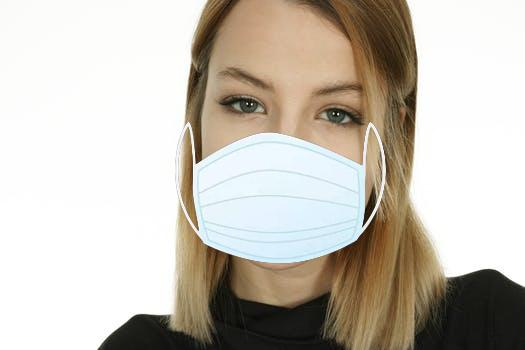

In [ ]:
cv2_imshow(im)

In [ ]:
 im=cv2.flip(im,1,1)
 rerect_sized=cv2.resize(im,(150,150))
 normalized=rerect_sized/255.0
 reshaped=np.reshape(normalized,(1,150,150,3))
 reshaped = np.vstack([reshaped])
 result=model.predict(reshaped)



In [ ]:
result

array([[0.97291994, 0.02708012]], dtype=float32)